Import các thư viện cần thiết

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Đọc dữ liệu   

In [ ]:
path = "/content/drive/MyDrive/Dataset/winequality-red.csv"
data = pd.read_csv(path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

Thông tin tóm lược dữ liệu

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tìm giá trị khuyết

In [ ]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Phân tích đơn biến



Phân tích phân phối các cột dữ liệu

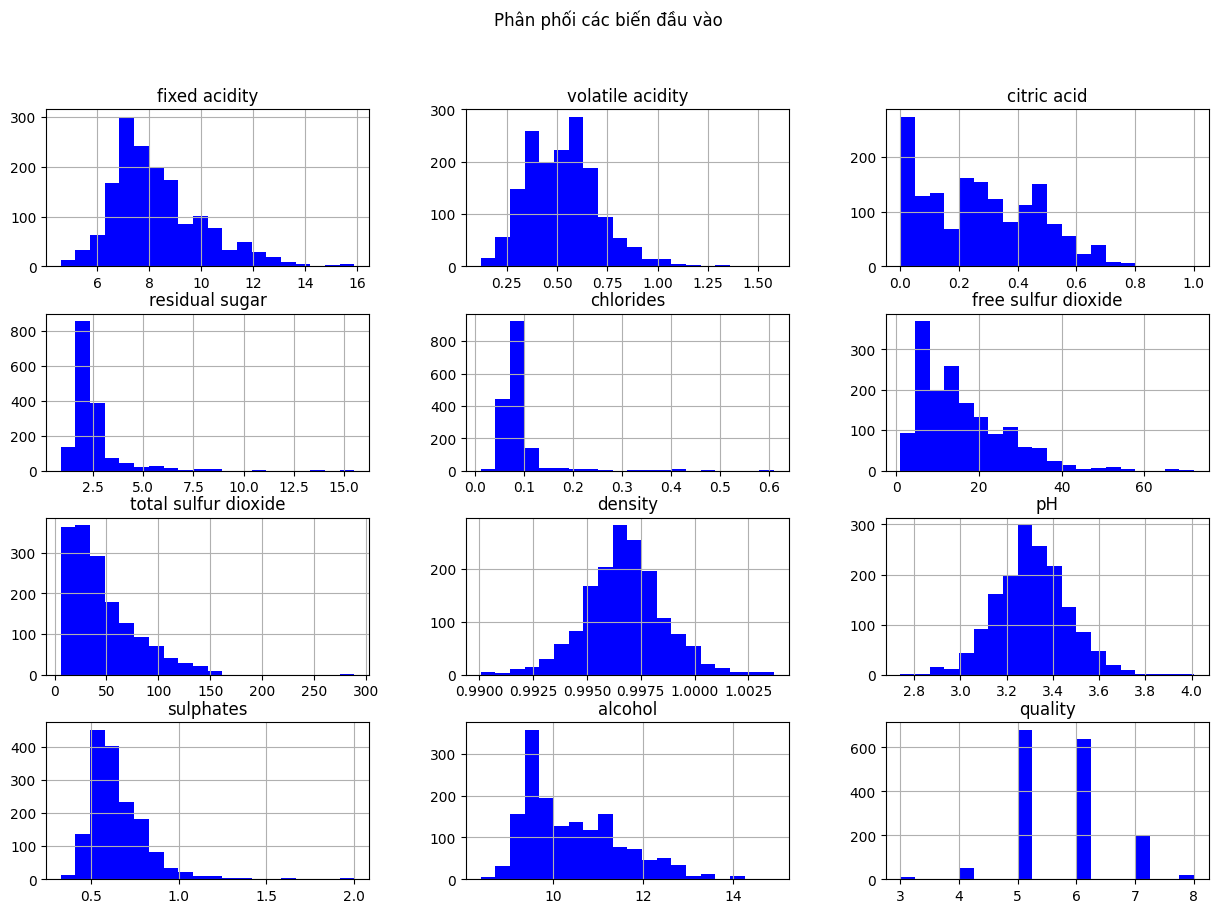

In [ ]:
data.hist(bins=20, figsize=(15, 10), color='blue')
plt.suptitle("Phân phối các biến đầu vào")
plt.show()

Phân tích biến phụ thuộc "Quality" để xây dựng mô hình dự đoán

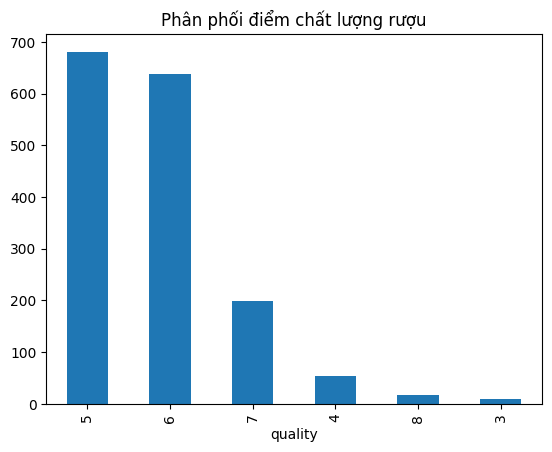

In [ ]:
data['quality'].value_counts().plot(kind='bar')
plt.title('Phân phối điểm chất lượng rượu')
plt.show()

Dùng boxplot để phát hiện giá trị ngoại lai của từng cột

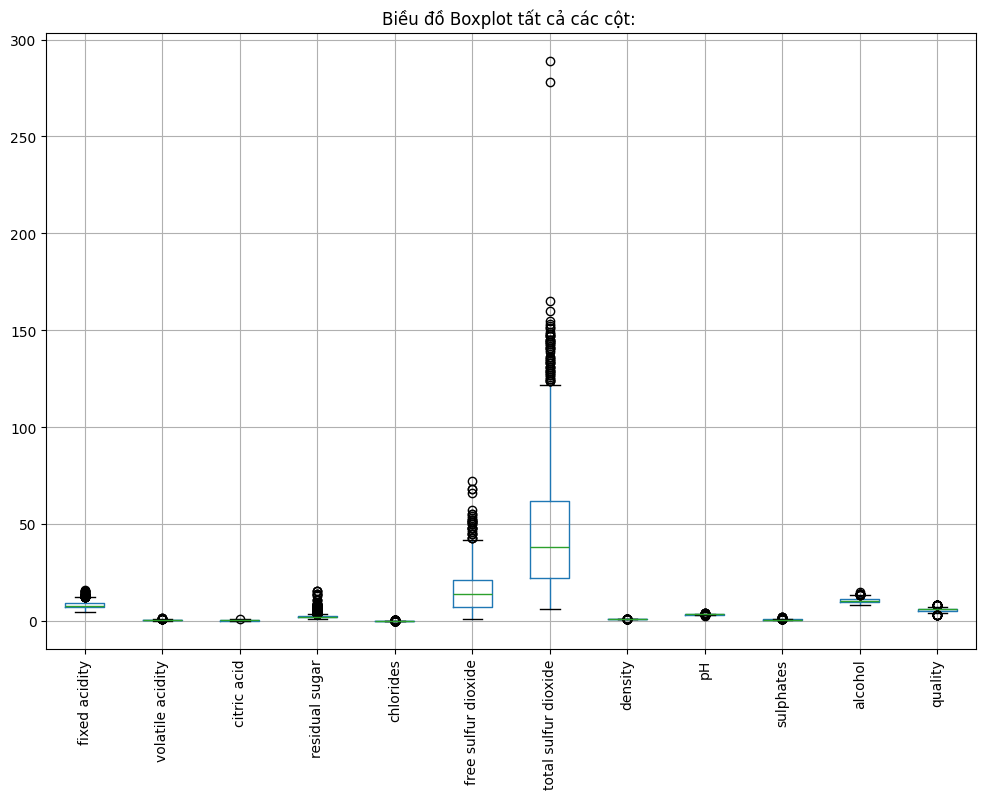

In [ ]:
data.boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title("Biều đồ Boxplot tất cả các cột: ")
plt.show()

Phân tích hai biến để xem mối quan hệ giữa từng biến với biến phụ thuộc

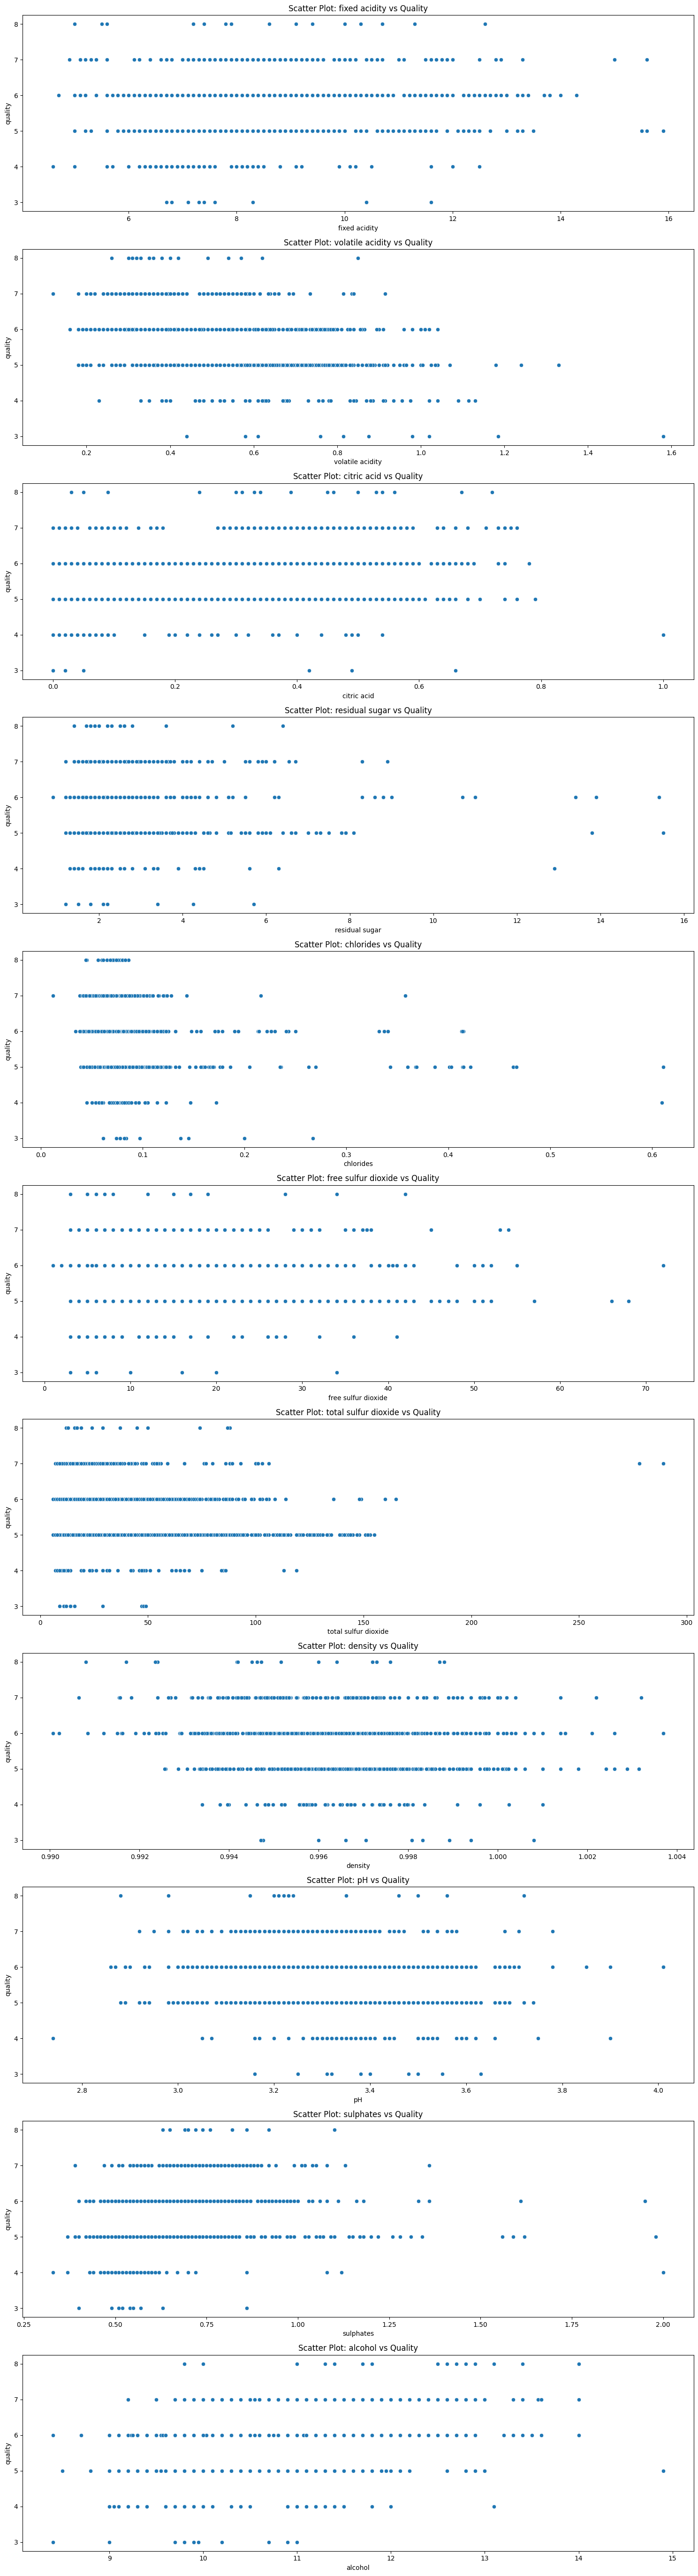

In [ ]:
import seaborn as sns

# Xác định các cột độc lập (trừ 'quality')
columns = [col for col in data.columns if col != 'quality']

# Tạo biểu đồ scatter plot cho từng biến
plt.figure(figsize=(15, len(columns) * 5))  # Điều chỉnh kích thước hình vẽ
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    sns.scatterplot(x=col, y='quality', data=data)
    plt.title(f'Scatter Plot: {col} vs Quality')

plt.tight_layout()
plt.show()

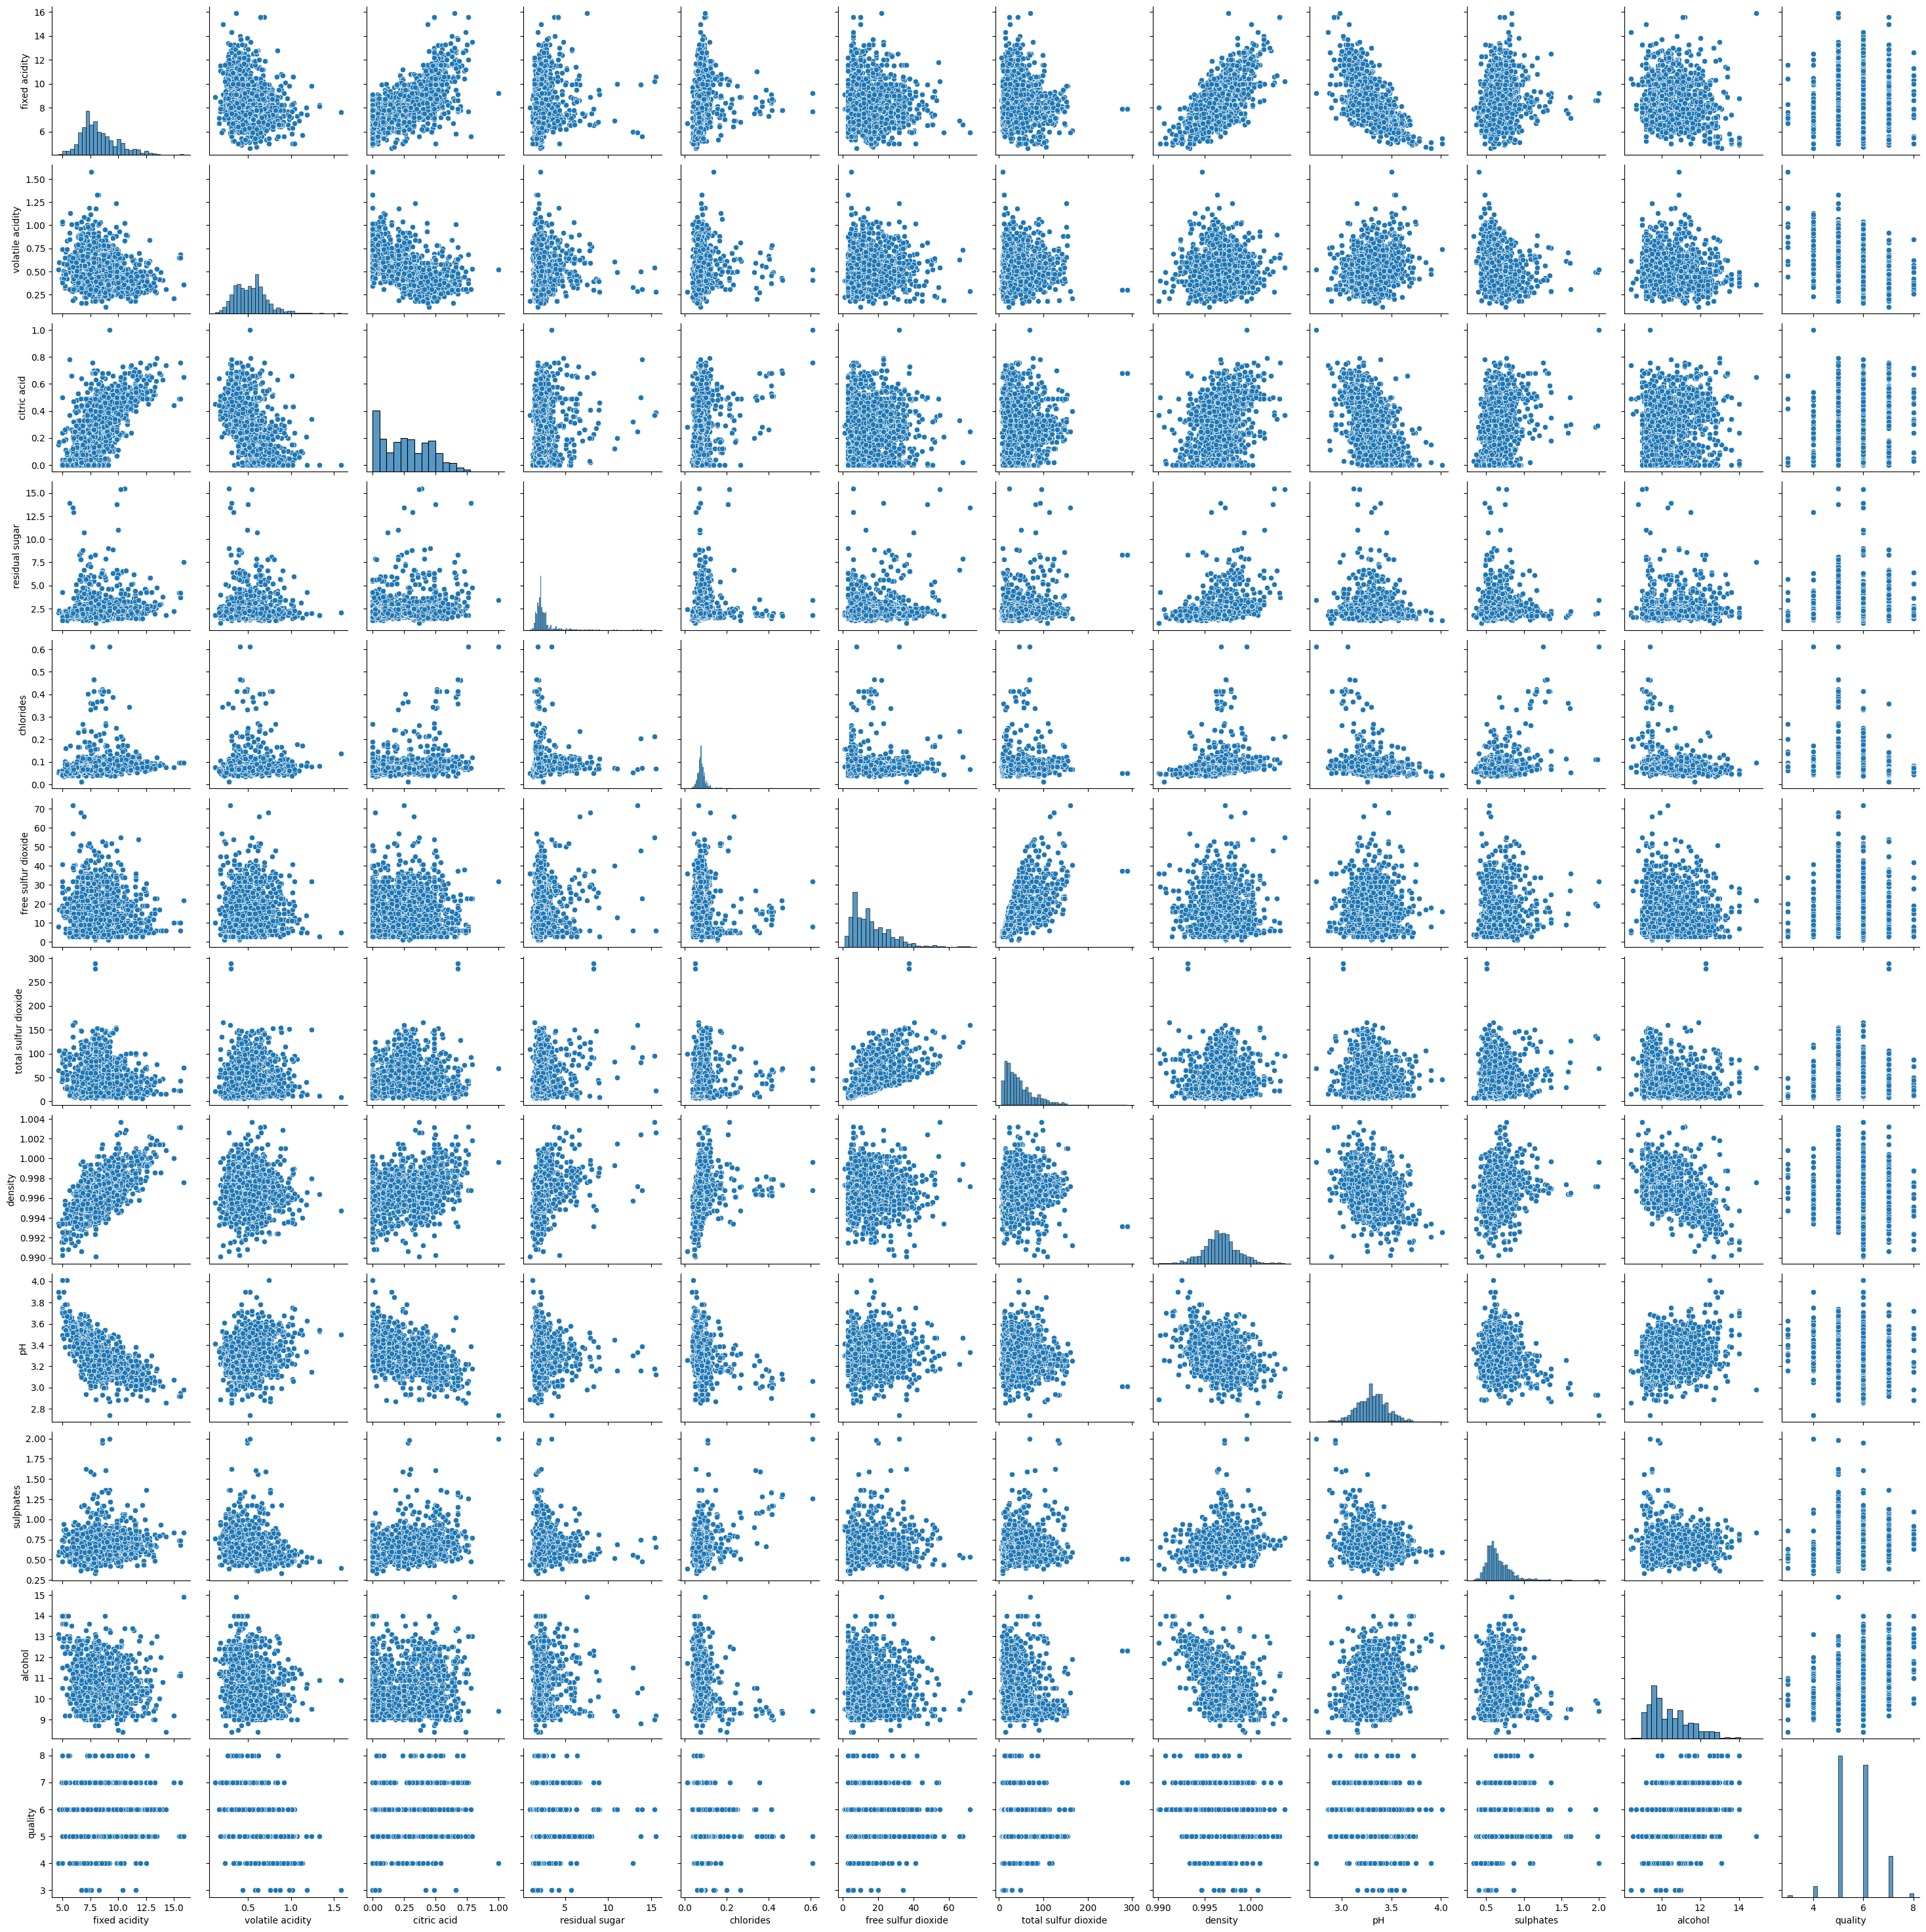

In [ ]:
sns.pairplot(data)

# Phân tích đa biến

Biểu đồ tương quan xem mối quan hệ giữa tất cả các biến trong tập dữ liệu

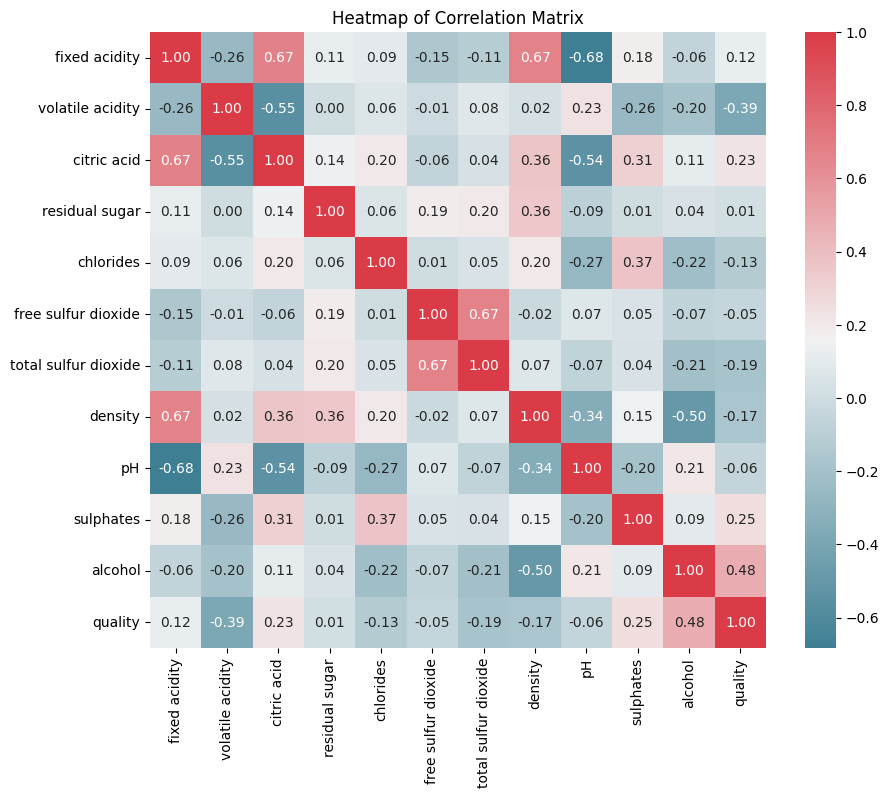

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()

# Tạo mặt nạ tam giác (nếu cần)
mask = np.zeros_like(corr, dtype=bool)

# Vẽ heatmap với giá trị số
sns.heatmap(
    corr,
    mask=mask,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True,  # Hiển thị số trên ô
    fmt=".2f",   # Định dạng số với 2 chữ số thập phân
    ax=ax
)

plt.title("Heatmap of Correlation Matrix")
plt.show()



Theo như biểu đồ trên hai biến có liên quan đến biến phụ thuộc nhiều nhất là alcohol và sulphates

# Xây dựng mô hình

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = data.drop('quality',axis=1)
Y = data['quality']

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X_train.shape

(1119, 11)

In [ ]:
Y_train.shape

(1119,)

In [ ]:
import math
from sklearn import metrics
# Dự đoán
y_pred = model.predict(X_test)

# Tính các chỉ số hồi quy
r2 = metrics.r2_score(Y_test, y_pred)
print("------------Kết quả đánh giá mô hình------------")
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print(f'R-squared (R²): {r2}')

------------Kết quả đánh giá mô hình------------
MAE: 0.511122589378869
MSE: 0.40364787420940706
RMSE: 0.6353328845647823
R-squared (R²): 0.36335496397259437


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


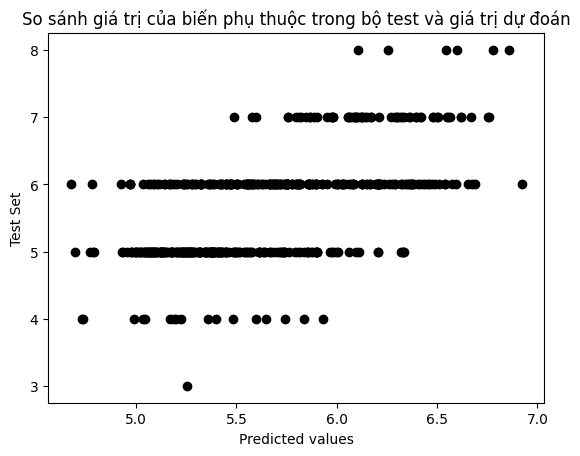

In [ ]:
plt.title('So sánh giá trị của biến phụ thuộc trong bộ test và giá trị dự đoán')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_pred, Y_test,  color='black')
plt.show()

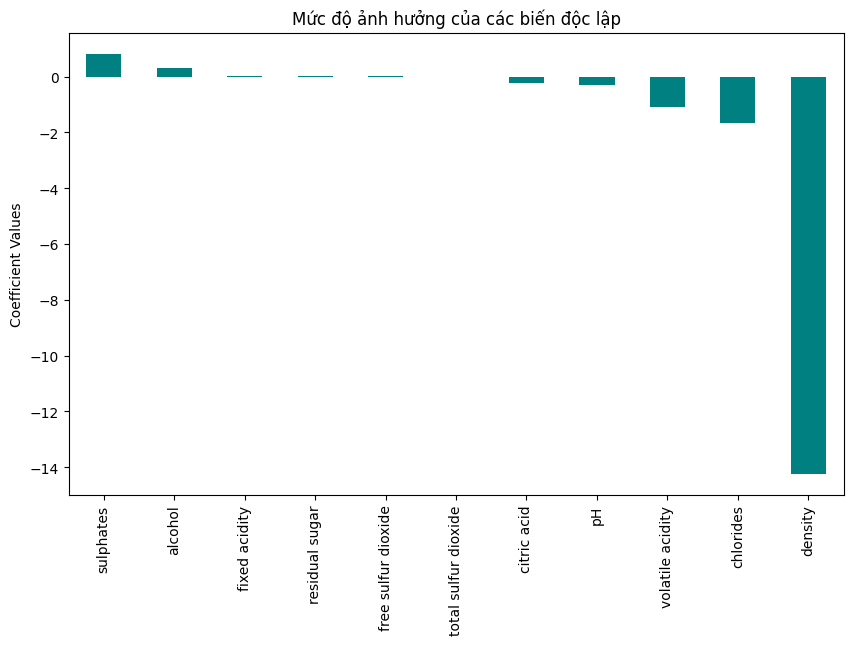

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Mức độ ảnh hưởng của các biến độc lập")
plt.ylabel("Coefficient Values")
plt.show()

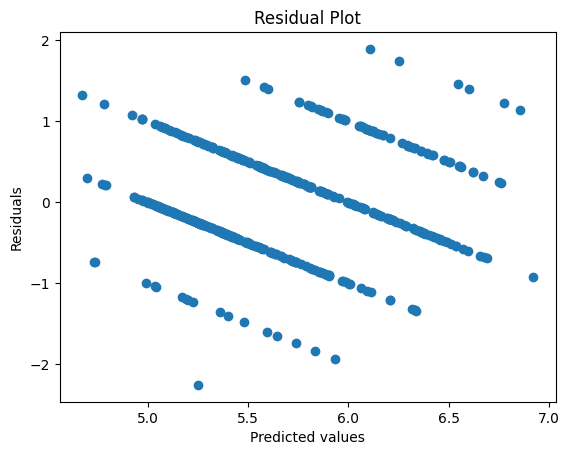

In [ ]:
residuals = Y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


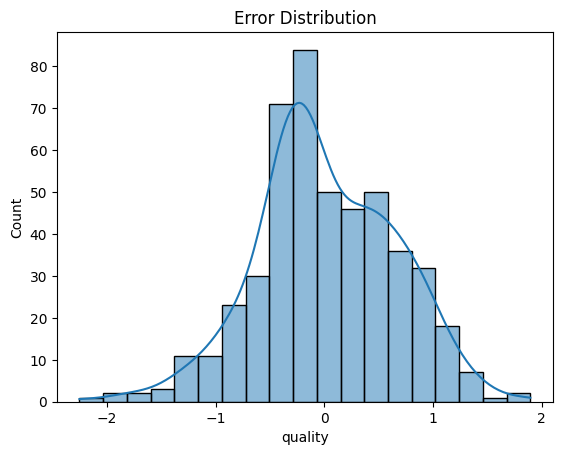

In [ ]:
sns.histplot(residuals, kde=True)
plt.title('Error Distribution')
plt.show()

# Sử dụng GridCV và RandomForest để so sánh chỉ số

In [ ]:
X1 = data.drop('quality', axis=1)
Y1 = data['quality']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1,test_size=0.3, random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X1_train, Y1_train)

best_model = grid_search.best_estimator_

# Huấn luyện lại mô hình tốt nhất trên tập train
best_model.fit(X1_train, Y1_train)

# Dự đoán trên tập test
y_pred1 = best_model.predict(X1_test)

# Đánh giá kết quả mô hình Random Forest
print("------------Kết quả đánh giá mô hình Random Forest------------")
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred1)))
print(f'R-squared (R²): {metrics.r2_score(Y_test, y_pred1)}')

------------Kết quả đánh giá mô hình Random Forest------------
MAE: 0.44367708333333333
MSE: 0.34830171875
RMSE: 0.5901709233349267
R-squared (R²): 0.45064851210646295


Sử dụng K-Fold cross-Validation

In [ ]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# KFold Cross-Validation
fold = 1
X2 = data.drop('quality', axis=1).values
Y2 = data['quality'].values

for train_index, test_index in kf.split(X2):
    print(f"Fold {fold}:")
    fold += 1
    X2_train, X2_test = X2[train_index], X2[test_index]
    Y2_train, Y2_test = Y2[train_index], Y2[test_index]
    model.fit(X2_train, Y2_train)
    y_pred2 = model.predict(X2_test)
    mae2 = metrics.mean_absolute_error(Y2_test, y_pred2)
    mse2 = metrics.mean_squared_error(Y2_test, y_pred2)
    rmse2 = np.sqrt(mse2)
    r22 = metrics.r2_score(Y2_test, y_pred2)
    print('  MAE:', mae2)
    print('  MSE:', mse2)
    print('  RMSE:', rmse2)
    print('  R-squared (R²):', r22)
    print("----------------------------------------")
    mae_list.append(mae2)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    r2_list.append(r22)

Fold 1:
  MAE: 0.48930631122765567
  MSE: 0.3836876812909553
  RMSE: 0.6194252830575737
  R-squared (R²): 0.42488408917100207
----------------------------------------
Fold 2:
  MAE: 0.520198475976784
  MSE: 0.39635582865578745
  RMSE: 0.6295679698458201
  R-squared (R²): 0.380542783053226
----------------------------------------
Fold 3:
  MAE: 0.5348560668021622
  MSE: 0.45581172175300655
  RMSE: 0.6751382982419281
  R-squared (R²): 0.23211502521209737
----------------------------------------
Fold 4:
  MAE: 0.5204095763794818
  MSE: 0.4584765376286242
  RMSE: 0.6771089555076231
  R-squared (R²): 0.3317581779040777
----------------------------------------
Fold 5:
  MAE: 0.5260276471725689
  MSE: 0.4630614577413617
  RMSE: 0.68048619217539
  R-squared (R²): 0.3408377825745741
----------------------------------------
Fold 6:
  MAE: 0.5477848355242808
  MSE: 0.4995674375207164
  RMSE: 0.7068008471420478
  R-squared (R²): 0.20144074926441835
----------------------------------------
Fold 7:


In [ ]:
# In kết quả trung bình sau tất cả các folds
print("------------Kết quả đánh giá trung bình------------")
print('Average MAE:', np.mean(mae_list))
print('Average MSE:', np.mean(mse_list))
print('Average RMSE:', np.mean(rmse_list))
print('Average R-squared (R²):', np.mean(r2_list))

------------Kết quả đánh giá trung bình------------
Average MAE: 0.5053948259297155
Average MSE: 0.425592980795384
Average RMSE: 0.6508813572489744
Average R-squared (R²): 0.34463715073363976


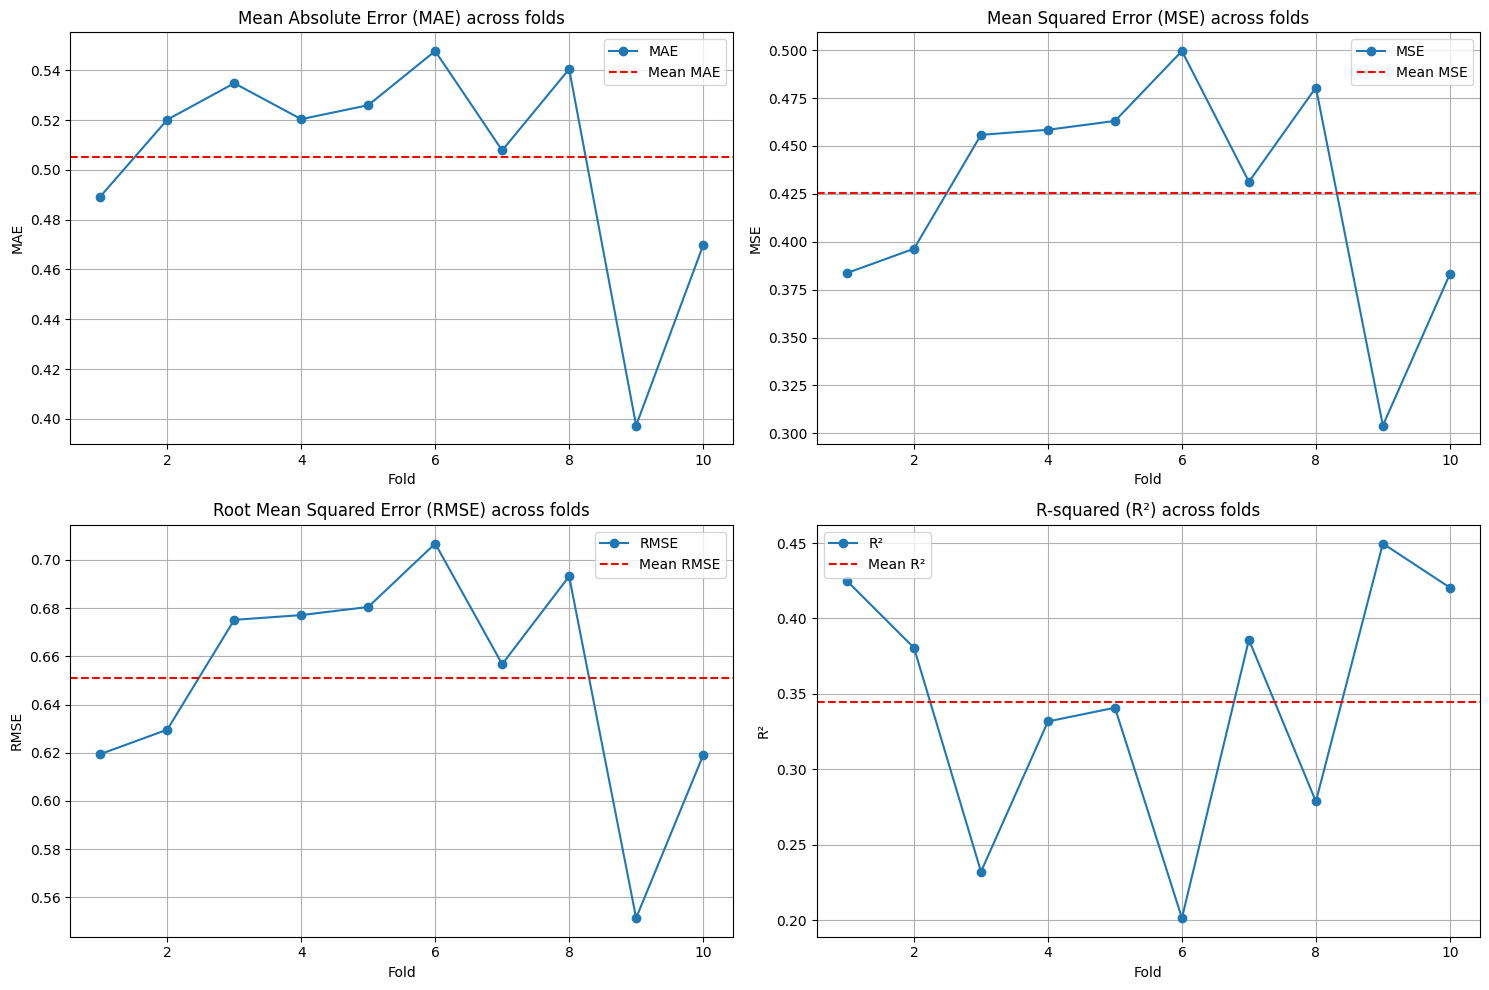

In [ ]:
# Số lượng folds
folds = np.arange(1, k+1)

# Vẽ biểu đồ cho từng chỉ số
plt.figure(figsize=(15, 10))

# MAE
plt.subplot(2, 2, 1)
plt.plot(folds, mae_list, marker='o', label='MAE')
plt.axhline(y=np.mean(mae_list), color='r', linestyle='--', label='Mean MAE')
plt.title('Mean Absolute Error (MAE) across folds')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# MSE
plt.subplot(2, 2, 2)
plt.plot(folds, mse_list, marker='o', label='MSE')
plt.axhline(y=np.mean(mse_list), color='r', linestyle='--', label='Mean MSE')
plt.title('Mean Squared Error (MSE) across folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# RMSE
plt.subplot(2, 2, 3)
plt.plot(folds, rmse_list, marker='o', label='RMSE')
plt.axhline(y=np.mean(rmse_list), color='r', linestyle='--', label='Mean RMSE')
plt.title('Root Mean Squared Error (RMSE) across folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# R-squared
plt.subplot(2, 2, 4)
plt.plot(folds, r2_list, marker='o', label='R²')
plt.axhline(y=np.mean(r2_list), color='r', linestyle='--', label='Mean R²')
plt.title('R-squared (R²) across folds')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()